# ¿Cuál es la mejor tarifa?

## Descripción del proyecto
---

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

### Objetivo
El objetivo de este proyecto es evaluar el comportamiento de los clientes y determinar cuál tarifa de Megaline es más rentable.

Las acciones a realizar: 
- Paso 1: Cargar y explorar los datos
- Paso 2: Manipulación de datos
- Paso 3: Análisis de datos
- Paso 4: Pruebas de hipótesis
- Paso 5: Conclusiones

## Cargar y explorar los datos
---

En esta sección, comenzaremos cargando las bibliotecas necesarias y los datos proporcionados. Luego, realizaremos una exploración inicial del conjunto de datos para comprender su estructura. Esto incluirá:

- Verificar el tamaño del dataset (número de filas y columnas)
- Examinar los tipos de datos en cada columna
- Identificar la presencia de valores faltantes o atípicos que puedan requerir tratamiento antes de proceder con el análisis.

### Cargar ambiente
Importamos las bibliotecas esenciales para el análisis.

In [213]:
## Cargar el ambiente de trabajo
import pandas as pd
import numpy as np
import math as mt
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns

### Cargar datasets
Leemos los archivos de datos proporcionados para cada dataset por analizar. 

In [214]:
# Cargar los datos en diferentes DataFrames

## Usuarios
df_users= pd.read_csv("../data/megaline_users.csv")

## Llamadas
df_calls= pd.read_csv("../data/megaline_calls.csv")

## Mensajes
df_messages= pd.read_csv("../data/megaline_messages.csv")

## Tráfico de datos
df_internet= pd.read_csv("../data/megaline_internet.csv")

## Tarifas
df_plans= pd.read_csv("../data/megaline_plans.csv")

### Exploración de datasets
En esta etapa, realizaremos un análisis preliminar de los datasets para comprender su estructura y calidad. 

#### Inspección de la base de datos **`users`**

In [215]:
## Visualización del df
print(df_users.head())

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  


In [216]:
## Información general 
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [217]:
# Valores duplicados explícitos
## Número de valores duplicados
print(df_users.duplicated().sum())
print()

## Identificación de valores duplicados
print(df_users[df_users.duplicated()])

0

Empty DataFrame
Columns: [user_id, first_name, last_name, age, city, reg_date, plan, churn_date]
Index: []


In [218]:
# Valores duplicados implícitos
## Número de valores duplicados
print(df_users.duplicated(subset="user_id").sum())
print()

## Identificación de valores duplicados
print(df_users[df_users.duplicated(subset="user_id")])

0

Empty DataFrame
Columns: [user_id, first_name, last_name, age, city, reg_date, plan, churn_date]
Index: []


In [219]:
## Valores faltantes
print(df_users.isna().sum())

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64


In [220]:
## Estadísticas descriptivas para columnas numéricas
round(df_users.describe(),2)

,user_id,age
count,500.00,500.00
mean,1249.50,45.49
std,144.48,16.97
min,1000.00,18.00
25%,1124.75,30.00
50%,1249.50,46.00
75%,1374.25,61.00
max,1499.00,75.00


In [221]:
## Estadísticas descriptivas para columnas categóricas
df_users.describe(include="object")

,first_name,last_name,city,reg_date,plan,churn_date
count,500,500,500,500,500,34
unique,458,399,73,266,2,29
top,Seymour,Wilkinson,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-04,surf,2018-12-18
freq,3,3,80,5,339,3


El DataFrame de usuarios de Megaline contiene 500 observaciones y 8 variables, proporcionando tanto información personal de los clientes como datos sobre su interacción con la compañía.

Durante la exploración inicial, identificamos los siguientes problemas:

- La columna `city` incluye información adicional de la localidad que no corresponde solo a la ciudad.
- Las columnas `reg_date` y `churn_date` están formateadas como tipo objeto en lugar de tipo fecha.
- La columna `churn_date` presenta 466 valores faltantes.
- La variable `plan` podría ser más específica en cuanto a los tipos de plan.

No encontramos duplicados explícitos en el dataset. Para los duplicados implícitos, analizamos únicamente la columna `user_id`, ya que se supone que este identificador no debe repetirse.

En cuanto a los clientes, las edades oscilan entre 18 y 75 años, con una media de 46 años. El nombre más común es *Jasper* y el apellido más frecuente es *Caldwell*. Verificamos que no hubiera más de un cliente llamado *Jasper Caldwell*. La mayoría de los usuarios están suscritos al plan `surf`.

#### Inspección de la base de datos **`calls`**

In [222]:
## Visualización del df
print(df_calls.head())

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


In [223]:
## Información general 
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [224]:
# Valores duplicados explícitos
## Número de valores duplicados
print(df_calls.duplicated().sum())
print()

## Identificación de valores duplicados
print(df_calls[df_calls.duplicated()])

0

Empty DataFrame
Columns: [id, user_id, call_date, duration]
Index: []


In [225]:
# Valores duplicados implícitos
## Número de valores duplicados
print(df_calls.duplicated(subset="id").sum())
print()

## Identificación de valores duplicados
print(df_calls[df_calls.duplicated(subset="id")])

0

Empty DataFrame
Columns: [id, user_id, call_date, duration]
Index: []


In [226]:
## Valores faltantes
print(df_calls.isna().sum())

id           0
user_id      0
call_date    0
duration     0
dtype: int64


In [227]:
## Estadísticas descriptivas para columnas numéricas
round(df_calls.describe(),2)

,user_id,duration
count,137735.00,137735.00
mean,1247.66,6.75
std,139.42,5.84
min,1000.00,0.00
25%,1128.00,1.29
50%,1247.00,5.98
75%,1365.00,10.69
max,1499.00,37.60


In [228]:
## Estadísticas descriptivas para columnas categóricas
df_calls.describe(include="object")

,id,call_date
count,137735,137735
unique,137735,351
top,1499_203,2018-12-27
freq,1,1091


El DataFrame de las llamadas con Megaline contiene 137,735 observaciones y 4 variables, con información sobre las llamadas realizadas durante el año 2018.

Durante la revisión inicial, identificamos los siguientes problemas:

- La columna `duration` no especifica las unidades de medida.
- La columna `call_date` está almacenada como tipo objeto en lugar de tipo fecha.
- La columna `id` no deja claro que se refiere al identificador de cada llamada.

No se encontraron duplicados explícitos en el dataset. Para los duplicados implícitos, analizamos únicamente la columna `id`, ya que este identificador debe ser único. Tampoco se identificaron valores ausentes.

En cuanto a las llamadas, observamos que tienen una duración promedio de 6.75 minutos, variando entre 0 y 37.6 minutos. El registro de llamadas comienza el *15 de enero de 2018* y finaliza el *31 de diciembre de 2018*. La fecha con mayor número de llamadas fue el *27 de diciembre de 2018*, probablemente debido a las celebraciones de Navidad y Año Nuevo.

#### Inspección de la base de datos **`messages`**

In [229]:
## Visualización del df
df_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [230]:
## Información general 
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [231]:
# Valores duplicados explícitos
## Número de valores duplicados
print(df_messages.duplicated().sum())
print()

## Identificación de valores duplicados
print(df_messages[df_messages.duplicated()])

0

Empty DataFrame
Columns: [id, user_id, message_date]
Index: []


In [232]:
# Valores duplicados implícitos
## Número de valores duplicados
print(df_messages.duplicated(subset="id").sum())
print()

## Identificación de valores duplicados
print(df_messages[df_messages.duplicated(subset="id")])

0

Empty DataFrame
Columns: [id, user_id, message_date]
Index: []


In [233]:
## Valores faltantes
print(df_messages.isna().sum())

id              0
user_id         0
message_date    0
dtype: int64


In [234]:
## Estadísticas descriptivas para columnas categóricas
df_messages.describe(include="object")

,id,message_date
count,76051,76051
unique,76051,351
top,1497_613,2018-12-28
freq,1,702


El DataFrame de los mensajes de Megaline contiene 76,051 observaciones y 3 variables, con información sobre los mensajes enviados durante el año 2018.

Durante la exploración inicial, identificamos los siguientes problemas:

- La columna `message_date` está almacenada como tipo objeto en lugar de tipo fecha.
- La columna `id` no deja claro que se refiere al identificador de cada mensaje.

No se encontraron duplicados explícitos. Para los duplicados implícitos, analizamos solo la columna `id`, ya que se espera que este identificador sea único. Tampoco se identificaron valores ausentes en el dataset.

En cuanto a los mensajes, los registros comienzan el *15 de enero de 2018* y finalizan el *31 de diciembre de 2018*, de forma similar al dataset de las llamadas. La fecha con mayor actividad fue el *28 de diciembre de 2018*, un patrón cercano al observado en las llamadas, posiblemente vinculado con las celebraciones de Navidad y Año Nuevo.

#### Inspección de la base de datos **`internet`**

In [235]:
## Visualización del df
df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [236]:
## Información general 
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [237]:
# Valores duplicados explícitos
## Número de valores duplicados
print(df_internet.duplicated().sum())
print()

## Identificación de valores duplicados
print(df_internet[df_internet.duplicated()])

0

Empty DataFrame
Columns: [id, user_id, session_date, mb_used]
Index: []


In [238]:
# Valores duplicados implícitos
## Número de valores duplicados
print(df_internet.duplicated(subset="id").sum())
print()

## Identificación de valores duplicados
print(df_internet[df_internet.duplicated(subset="id")])

0

Empty DataFrame
Columns: [id, user_id, session_date, mb_used]
Index: []


In [239]:
## Valores faltantes
print(df_internet.isna().sum())

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64


In [240]:
## Estadísticas descriptivas para columnas numéricas
round(df_internet.describe(),2)

,user_id,mb_used
count,104825.00,104825.00
mean,1242.50,366.71
std,142.05,277.17
min,1000.00,0.00
25%,1122.00,136.08
50%,1236.00,343.98
75%,1367.00,554.61
max,1499.00,1693.47


In [241]:
## Estadísticas descriptivas para columnas categóricas
df_internet.describe(include="object")

,id,session_date
count,104825,104825
unique,104825,351
top,1499_219,2018-12-24
freq,1,851


In [242]:
print(df_internet["session_date"].sort_values().head())
print()
print(df_internet["session_date"].sort_values().tail())

17220    2018-01-15
17098    2018-01-15
17135    2018-01-16
17051    2018-01-16
44475    2018-01-17
Name: session_date, dtype: object

69664    2018-12-31
89875    2018-12-31
11395    2018-12-31
70988    2018-12-31
26960    2018-12-31
Name: session_date, dtype: object


El DataFrame de tráfico de datos de Megaline contiene 104,825 observaciones y 4 variables, que detallan el uso de internet de los clientes durante el año 2018.

Durante la revisión inicial, identificamos los siguientes problemas:

- La columna `session_date` está almacenada como tipo objeto en lugar de tipo fecha.
- La columna `id` no especifica claramente que es el identificador de cada sesión de internet.
- La columna `mb_used` podría ser convertida de megabytes a gigabytes para una mayor claridad.

No se encontraron duplicados explícitos en el dataset. Para los duplicados implícitos, revisamos únicamente la columna `id`, que debería ser única. Tampoco se detectaron valores ausentes.

En cuanto al uso de internet, los registros abarcan desde el *15 de enero de 2018* hasta el *31 de diciembre de 2018*, coincidiendo con los periodos de las bases de datos de llamadas y mensajes. La fecha con mayor actividad fue el *24 de diciembre de 2018*, probablemente debido a las festividades de Nochebuena.

#### Inspección de la base de datos **`plans`**

In [243]:
## Visualización del df
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [244]:
## Información general 
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [245]:
# Valores duplicados explícitos
## Número de valores duplicados
print(df_plans.duplicated().sum())

0


In [246]:
## Valores faltantes
print(df_plans.isna().sum())

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64


El DataFrame de planes tarifarios de Megaline contiene solo 2 observaciones y 8 variables, proporcionando detalles sobre las características de los planes ofrecidos por la compañía.

Durante la revisión, identificamos los siguientes aspectos que podrían mejorarse:

- La variable `mb_per_month_included` podría describirse de manera más clara.
- Las variables `usd_monthly_pay`, `usd_per_gb`, `usd_per_minute` y `usd_per_message` podrían tener nombres más descriptivos para reflejar mejor el costo de cada servicio.
- La variable `mb_included` podría convertirse a gigabytes para mayor claridad.

Aunque la base de datos es pequeña, realizamos una revisión de valores duplicados y ausentes, sin encontrar problemas.

Con base en la inspección de los datos, se puede inferir que el plan `surf` es una opción más económica, mientras que el plan `ultimate` parece ser un paquete más exclusivo.

## Manipulación de datos
---
En esta etapa, abordamos los errores identificados en los diferentes DataFrames, lo que nos permite preparar los datos para un análisis más adecuado.

### Manipulación base de datos **`users`**

Los errores observados en la tabla de usuaris fueron los siguientes: 
- La columna `city` incluye información adicional de la localidad que no corresponde solo a la ciudad.
- Las columnas `reg_date` y `churn_date` están formateadas como tipo objeto en lugar de tipo fecha.
- La columna `churn_date` presenta 466 valores faltantes.
- La variable `plan` podría ser más específica en cuanto a los tipos de plan.

1. Para la variable `city` observamos que contiene información sobre la ciudad, el estado y sobre el área estadística metropolitana o *metropolitan statistical area* (MSA). Separamos la información en distintas columnas. 

In [247]:
# Separar la columna `city`
## Dividir columna en ciudad estado y entidad geográfica utilizando expresiones regulares:
# Ciudad: ^(.*?); cualquier texto antes de la coma.
# Estado: ([A-Z]{2}(?:-[A-Z]{2})*); permite estados compuestos como NY-NJ-PA.
# Entidad geográfica: (\w+)$; parte final (como "MSA").

df_users[["city_fixed", "state", "geographical_entity"]] = df_users["city"].str.extract(r"^(.*?),\s([A-Z]{2}(?:-[A-Z]{2})*)\s(\w+)$")

## Visualización de las nuevas columnas
df_users[["city_fixed", "state", "geographical_entity"]].head()

,city_fixed,state,geographical_entity
0,Atlanta-Sandy Springs-Roswell,GA,MSA
1,Seattle-Tacoma-Bellevue,WA,MSA
2,Las Vegas-Henderson-Paradise,NV,MSA
3,Tulsa,OK,MSA
4,Seattle-Tacoma-Bellevue,WA,MSA


In [248]:
## Estadísticas descriptivas para columnas 
df_users[["city_fixed", "state", "geographical_entity"]].describe(include="object")

,city_fixed,state,geographical_entity
count,500,500,500
unique,73,42,1
top,New York-Newark-Jersey City,NY-NJ-PA,MSA
freq,80,80,500


2. Para la variables `reg_date` hicimos la conversión de tipo objeto a tipo fecha. 

In [249]:
## Convertir tipo de columna
df_users["reg_date"]= pd.to_datetime(df_users["reg_date"])

3. Para la variable `churn_date`, suponemos que los clientes sin una fecha de cancelación registrada **continuaron activos** hasta finales de 2018.

    Primero, aprovechamos los valores faltantes para crear una nueva variable categórica llamada `client_status`, asignando el valor activo a aquellos registros que no tienen una fecha de cancelación.

    A continuación, imputamos la fecha `2019-01-01` en los valores faltantes de `churn_date`.   

> Es importante comentar y revisar estos pasos con el supervisor.


In [250]:
# Etiquetado de los clientes de acuerdo a su estatus e
## Creación función de etiquetado
def asignar_estado(row):
    if pd.isna(row["churn_date"]):
        return "Activo"
    else:
        return "Baja"

## Implementación de la función
df_users["client_status"] = df_users.apply(asignar_estado, axis=1)

In [251]:
# Imputación de las fechas NA
## Rellenar laos Nas fecha posterior a 2018
df_users["churn_date"] = df_users["churn_date"].fillna("2019-01-01")

## Convertir tipo de columna
df_users["churn_date"]= pd.to_datetime(df_users["churn_date"])

4. Finalmente renombramos el nombre de la variable `plans` por algo más informativo. 

In [252]:
## Renombrar la columna 
df_users= df_users.rename(columns={"plan": "plan_name"})

In [253]:
## Estadísticas descriptivas para columnas categóricas
df_users.describe(include="object")

,first_name,last_name,city,plan_name,city_fixed,state,geographical_entity,client_status
count,500,500,500,500,500,500,500,500
unique,458,399,73,2,73,42,1,2
top,Seymour,Wilkinson,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,New York-Newark-Jersey City,NY-NJ-PA,MSA,Activo
freq,3,3,80,339,80,80,500,466


Los pasos realizados en la tabla de usuarios fueron los siguientes:

1. Separamos la columna `city` en tres columnas: ciudad, estado y tipo de entidad geográfica.
2. Convertimos la variable `reg_date` al tipo de fecha.
3. Convertimos la variable `churn_date` al tipo de fecha e imputamos los 466 valores ausentes con la fecha activa "2019-01-01".
4. Creamos la variable `client_status`, que proporciona información sobre el estado del cliente en la compañía.
5. Cambiamos el nombre de la variable `plan` para que sea más coherente con otra base de datos.

Gracias a estos cambios, pudimos obtener nueva información. Por ejemplo, identificamos 73 ciudades, siendo New York-Newark-Jersey City la más frecuente. Entre los 42 estados, el más común fue NY-NJ-PA, y no registramos usuarios con una entidad geográfica diferente a MSA. Además, la gran mayoría de los clientes permanecieron activos hasta el 31 de diciembre de 2018, como habíamos observado previamente.

### Manipulación base de datos **`calls`**

En cuanto a los errores que identificamos, se encuentran: 
- La columna `duration` no especifica las unidades de medida.
- La columna `call_date` está almacenada como tipo objeto en lugar de tipo fecha.
- La columna `id` no deja claro que se refiere al identificador de cada llamada.

1. Renombrar las columnas `duration` e `id` para hacerlas más específicas. 

In [254]:
## Renombrar las columnas 
df_calls= df_calls.rename(columns={"id": "call_id","duration": "call_duration_minutes"})

2. Convertir el tipo de columna `call_date` a tipo fecha. 

In [255]:
## Convertir tipo de columna
df_calls["call_date"]= pd.to_datetime(df_calls["call_date"])

Los pasos realizados en la tabla de llamadas fueron los siguientes:

- Especificamos el nombre de la columna `id`.
- Definimos las unidades para la duración de llamadas de la variable `duration`.
- Convertimos la variable `call_date` al tipo de fecha.

### Manipulación base de datos **`messages`**

En cuanto a los errores que identificamos, se encuentran: 
- La columna `id` no deja claro que se refiere al identificador de cada mensaje.
- La columna `message_date` está almacenada como tipo objeto en lugar de tipo fecha.

1. Renombrar la columna `id` para hacerla más específica. 

In [256]:
## Renombrar las columnas 
df_messages= df_messages.rename(columns={"id": "message_id"})

2. Convertir el tipo de columna `message_date` a tipo fecha. 

In [257]:
## Convertir tipo de columna
df_messages["message_date"]= pd.to_datetime(df_messages["message_date"])

Los pasos realizados en la tabla de mensajes fueron los siguientes:

- Especificamos el nombre de la columna `id`.
- Convertimos la variable `message_date` al tipo de fecha.

### Manipulación base de datos **`internet`**

En cuanto a los errores que identificamos, se encuentran: 
- La columna `session_date` está almacenada como tipo objeto en lugar de tipo fecha.
- La columna `id` no especifica claramente que es el identificador de cada sesión de internet.
- La columna `mb_used` podría ser convertida de megabytes a gigabytes para una mayor claridad.

1. Renombrar la columna `id` para hacerla más específica. 

In [258]:
## Renombrar las columnas 
df_internet= df_internet.rename(columns={"id": "internet_id"})

2. Convertir el tipo de columna `session_date` a tipo fecha. 

In [259]:
## Convertir tipo de columna
df_internet["session_date"]= pd.to_datetime(df_internet["session_date"])

3. Transformar el consumo de Mb utilizados a Gb.

In [260]:
## Convertir unidades mb a gb
df_internet["gb_used"]= round(df_internet["mb_used"]/ 1024.2)

Los pasos realizados en la tabla de tráfico de internet fueron los siguientes:

- Especificamos el nombre de la columna `id`.
- Convertimos la variable `session_date` al tipo de fecha.
- Creamos la variable `gb_used` al convertir megabytes (Mb) a gigabytes (Gb).

### Manipulación base de datos **`plans`**

En cuanto a los errores que identificamos, se encuentran: 
- La variable `mb_per_month_included` podría describirse de manera más clara.
- Las variables `usd_monthly_pay`, `usd_per_gb`, `usd_per_minute` y `usd_per_message` podrían tener nombres más descriptivos para reflejar mejor el costo de cada servicio.
- La variable `mb_included` podría convertirse a gigabytes para mayor claridad.

1. Renombramos las variables `usd_monthly_pay`, `usd_per_gb`, `usd_per_minute` y `usd_per_message` para tener una mejor conotación. 

In [261]:
## Renombrar las columnas 
df_plans= df_plans.rename(columns={
    "usd_monthly_pay": "monthly_fee_usd", 
    "mb_per_month_included": "mb_included", 
    "usd_per_minute": "minutes_extra_price", 
    "usd_per_message": "message_extra_price",
    "usd_per_gb": "gb_extra_price"
    })

2. Transformamos los Mb incluidos a Gb. 

In [262]:
## Convertir los mb incluidos a Gb
df_plans["gb_included"]= round(df_plans["mb_included"]/ 1024.2)

Los pasos realizados en la tabla de planes fueron los siguientes:

- Especificamos el nombre de las columnas `mb_per_month_included`, `usd_monthly_pay`, `usd_per_gb`, `usd_per_minute` y `usd_per_message`. 
- Creamos la variable `gb_included` al convertir megabytes (Mb) a gigabytes (Gb).

## Análisis de datos
En esta sección, realizamos un análisis de los datos de clientes, llamadas, mensajes y tráfico de internet para determinar cuál de las tarifas de Megaline es más rentable.

### Estudiar las condiciones de las tarifas
Antes de comenzar el análisis, estudiamos las condiciones de las tarifas Surf y Ultimate para comprender sus características y beneficios.  

In [263]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
print(df_plans)

   messages_included  mb_included  minutes_included  monthly_fee_usd  \
0                 50        15360               500               20   
1               1000        30720              3000               70   

   gb_extra_price  message_extra_price  minutes_extra_price plan_name  \
0              10                 0.03                 0.03      surf   
1               7                 0.01                 0.01  ultimate   

   gb_included  
0         15.0  
1         30.0  


### Agregar datos por usuario
Realizamos los resumenes de datos, agregando los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.

#### Número de llamadas mensuales por cliente

In [264]:
# Número de llamadas hechas por cada usuario al mes
## Determinar el mes 
df_calls["month"] = df_calls["call_date"].dt.month

## Calcular el número de llamadas al mes por usuario
total_calls_user = df_calls.groupby(["user_id", "month"])["call_id"].count().reset_index().sort_values(by=["user_id", "month"],ascending=[True, True])

## Renombrar columna 
total_calls_user = total_calls_user.rename(columns={"call_id": "total_calls"})

## Visualización del df
print(total_calls_user.head())
print()

print("Número de llamadas registradas: ", total_calls_user.shape[0])

   user_id  month  total_calls
0     1000     12           16
1     1001      8           27
2     1001      9           49
3     1001     10           65
4     1001     11           64

Número de llamadas registradas:  2258


#### Número de minutos mensuales por cliente 

In [265]:
# Cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
## Calcular la cantidad de minutos usados por cada usuario al mes
total_minutes_user = df_calls.groupby(["user_id", "month"])["call_duration_minutes"].sum().reset_index().sort_values(by=["user_id", "month"],ascending=[True, True])

## Renombrar columna 
total_minutes_user = total_minutes_user.rename(columns={"call_duration_minutes": "total_minutes"})

## Visualización del df
print(total_minutes_user.head())

   user_id  month  total_minutes
0     1000     12         116.83
1     1001      8         171.14
2     1001      9         297.69
3     1001     10         374.11
4     1001     11         404.59


#### Número de mensajes mensuales por cliente

In [266]:
# Número de mensajes enviados por cada usuario al mes
## Determinar el mes 
df_messages["month"] = df_messages["message_date"].dt.month

## Calcular el número de mensajes al mes por usuario
total_messages_user = df_messages.groupby(["user_id", "month"])["message_id"].count().reset_index().sort_values(by=["user_id", "month"],ascending=[True, True])

## Renombrar columna 
total_messages_user = total_messages_user.rename(columns={"message_id": "total_messages"})

## Visualización del df
print(total_messages_user.head())
print()

print("Número de mensajes registrados: ", total_messages_user.shape[0])

   user_id  month  total_messages
0     1000     12              11
1     1001      8              30
2     1001      9              44
3     1001     10              53
4     1001     11              36

Número de mensajes registrados:  1806


#### Número de flujo de datos mensuales por cliente

In [267]:
# Volumen de tráfico de messages por cada usuario al mes
## Determinar el mes 
df_internet["month"] = df_internet["session_date"].dt.month

## Calcula el volumen del tráfico de Internet por usuario
total_internet_user = df_internet.groupby(["user_id", "month"])[["mb_used", "gb_used"]].sum().reset_index().sort_values(by=["user_id", "month"],ascending=[True, True])

## Renombrar columna 
total_internet_user = total_internet_user.rename(columns={"mb_used": "total_internet_mb", "gb_used": "total_internet_gb"})

## Visualización del df
print(total_internet_user.head())
print()

   user_id  month  total_internet_mb  total_internet_gb
0     1000     12            1901.47                2.0
1     1001      8            6919.15                5.0
2     1001      9           13314.82                8.0
3     1001     10           22330.49               20.0
4     1001     11           18504.30               13.0



#### Información consumo telefónico por cliente

Para tener una noción del consumo que tienen los clientes de la compañía juntamos los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.

In [268]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
## Llamadas y minutos
total_user_info = total_calls_user.merge(total_minutes_user, on = ["user_id", "month"], how = "outer")

## Mensajes
total_user_info = total_user_info.merge(total_messages_user, on = ["user_id", "month"], how = "outer")

## Internet
total_user_info = total_user_info.merge(total_internet_user, on = ["user_id", "month"], how = "outer")

In [269]:
# Añade la información de la tarifa
total_user_info = df_users[["user_id", "plan_name", "state"]].merge(total_user_info, on = "user_id", how = "outer")

total_user_info.head()

,user_id,plan_name,state,month,total_calls,total_minutes,total_messages,total_internet_mb,total_internet_gb
0,1000,ultimate,GA,12.0,16.0,116.83,11.0,1901.47,2.0
1,1001,surf,WA,8.0,27.0,171.14,30.0,6919.15,5.0
2,1001,surf,WA,9.0,49.0,297.69,44.0,13314.82,8.0
3,1001,surf,WA,10.0,65.0,374.11,53.0,22330.49,20.0
4,1001,surf,WA,11.0,64.0,404.59,36.0,18504.30,13.0


#### Calculo mensual por usuario

Una vez que tenemos los datos agregados de las llamadas, mensajes y tráfico por usuario, calcula los ingresos mensuales en una nueva variable llamada `monthly_revenue`. Para ello, restamos el límite del plan gratuito el número total de llamadas, mensajes de texto y datos. Posteriormente multiplicamos cada resultado por el valor del plan de llamadas. Seguimos una serie de paso para poder obtener el total de inngresos por cleinte seguimos los siguientes pasos: 

1. Inpeccionamos la base de datos que contiene los datos agregados por usuario. 

In [270]:
# Inspección de valores faltantes
total_user_info.isna().sum()

user_id                0
plan_name              0
state                  0
month                 10
total_calls           45
total_minutes         45
total_messages       497
total_internet_mb     26
total_internet_gb     26
dtype: int64

Notamos que existían valores faltantes a lo largo del Dataset creado. Por un lado, existen registros donde no se tiene información sobre el mes. Por otro lado, tenemos información faltante sobre llamadas, mensajes e internet. Esto puede ser debido al comportamiento único de cada cliente; Por ejemplo, existen clientes que no registran mensajes pero si llamadas y uso de interne. 

2. Eliminamos los valores donde no tenemos información sobre los meses e imputamos los valores donde no existe registro con 0, entendiendo que el usuario no hace uso de ese servicio. 

> Corroborar con el supervisor la eliminación e imputación de valores. 

In [271]:
## Eliminar datos sin información de meses
total_user_info.dropna(subset=["month"], inplace=True)

## Rellenar valores con 0
total_user_info.fillna(0, inplace=True)

## Convertimos a entero
total_user_info["month"] = total_user_info["month"].astype(int)

3. Aunque pueden existir otras maneras, quizás más sencillas. Decidimos unir la información de los planes al DataFrame con la información de cada usuario. 

In [272]:
## Unión características del plan
total_user_info = total_user_info.merge(df_plans, on = "plan_name", how = "outer")

total_user_info

,user_id,plan_name,state,month,total_calls,total_minutes,total_messages,total_internet_mb,total_internet_gb,messages_included,mb_included,minutes_included,monthly_fee_usd,gb_extra_price,message_extra_price,minutes_extra_price,gb_included
0,1001,surf,WA,8,27.0,171.14,30.0,6919.15,5.0,50,15360,500,20,10,0.03,0.03,15.0
1,1001,surf,WA,9,49.0,297.69,44.0,13314.82,8.0,50,15360,500,20,10,0.03,0.03,15.0
2,1001,surf,WA,10,65.0,374.11,53.0,22330.49,20.0,50,15360,500,20,10,0.03,0.03,15.0
3,1001,surf,WA,11,64.0,404.59,36.0,18504.30,13.0,50,15360,500,20,10,0.03,0.03,15.0
4,1001,surf,WA,12,56.0,392.93,44.0,19369.18,12.0,50,15360,500,20,10,0.03,0.03,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1493,ultimate,MA-NH,9,66.0,505.13,0.0,14991.17,12.0,1000,30720,3000,70,7,0.01,0.01,30.0
2289,1493,ultimate,MA-NH,10,66.0,424.25,0.0,16329.57,11.0,1000,30720,3000,70,7,0.01,0.01,30.0
2290,1493,ultimate,MA-NH,11,73.0,472.15,0.0,15630.78,12.0,1000,30720,3000,70,7,0.01,0.01,30.0
2291,1493,ultimate,MA-NH,12,65.0,446.28,0.0,15289.09,16.0,1000,30720,3000,70,7,0.01,0.01,30.0


4. Con la Dataframe con la información del consumo por usuario mensual y con la información de su plan, realizamos el cálculo de cada servicio excedido con su respectivo costro extra. De esta manera calculamos el ingreso total mensual por usuario. 

In [273]:
# Calcula el ingreso mensual para cada usuario
## Calcular los extras
### Minutos adicionales
total_user_info["extra_minutes"] = np.maximum(0, np.ceil(total_user_info["total_minutes"]-total_user_info["minutes_included"]))

### Costo extra por minutos excedidos
total_user_info["extra_minutes_cost"] = total_user_info["extra_minutes"]* total_user_info["minutes_extra_price"]

### Mensajes adicionales
total_user_info["extra_messages"] = np.maximum(0, total_user_info["total_messages"]-total_user_info["messages_included"])

### Costo extra por mensajes excedidos
total_user_info["extra_messages_cost"] = total_user_info["extra_messages"]* total_user_info["message_extra_price"]

### Gb adicionales
total_user_info["extra_gb"] = np.maximum(0, np.ceil(total_user_info["total_internet_gb"]-total_user_info["gb_included"]))

### Costo extra por Gb excedidos
total_user_info["extra_gb_cost"] = total_user_info["extra_gb"]* total_user_info["gb_extra_price"]


## Calculo ingreso mensual
total_user_info["monthly_revenue"]= total_user_info["monthly_fee_usd"] + total_user_info["extra_minutes_cost"]+ total_user_info["extra_messages_cost"]+ total_user_info["extra_gb_cost"]

# Mostrar los ingresos mensuales calculados
total_user_info

,user_id,plan_name,state,month,total_calls,total_minutes,total_messages,total_internet_mb,total_internet_gb,messages_included,...,message_extra_price,minutes_extra_price,gb_included,extra_minutes,extra_minutes_cost,extra_messages,extra_messages_cost,extra_gb,extra_gb_cost,monthly_revenue
0,1001,surf,WA,8,27.0,171.14,30.0,6919.15,5.0,50,...,0.03,0.03,15.0,0.0,0.0,0.0,0.00,0.0,0.0,20.00
1,1001,surf,WA,9,49.0,297.69,44.0,13314.82,8.0,50,...,0.03,0.03,15.0,0.0,0.0,0.0,0.00,0.0,0.0,20.00
2,1001,surf,WA,10,65.0,374.11,53.0,22330.49,20.0,50,...,0.03,0.03,15.0,0.0,0.0,3.0,0.09,5.0,50.0,70.09
3,1001,surf,WA,11,64.0,404.59,36.0,18504.30,13.0,50,...,0.03,0.03,15.0,0.0,0.0,0.0,0.00,0.0,0.0,20.00
4,1001,surf,WA,12,56.0,392.93,44.0,19369.18,12.0,50,...,0.03,0.03,15.0,0.0,0.0,0.0,0.00,0.0,0.0,20.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1493,ultimate,MA-NH,9,66.0,505.13,0.0,14991.17,12.0,1000,...,0.01,0.01,30.0,0.0,0.0,0.0,0.00,0.0,0.0,70.00
2289,1493,ultimate,MA-NH,10,66.0,424.25,0.0,16329.57,11.0,1000,...,0.01,0.01,30.0,0.0,0.0,0.0,0.00,0.0,0.0,70.00
2290,1493,ultimate,MA-NH,11,73.0,472.15,0.0,15630.78,12.0,1000,...,0.01,0.01,30.0,0.0,0.0,0.0,0.00,0.0,0.0,70.00
2291,1493,ultimate,MA-NH,12,65.0,446.28,0.0,15289.09,16.0,1000,...,0.01,0.01,30.0,0.0,0.0,0.0,0.00,0.0,0.0,70.00


### Estudia el comportamiento de usuario

Examinamos el comportamiento de los clientes en función de su tarifa, evaluando variables como la duración de las llamadas, la cantidad de mensajes enviados y el uso de datos. Calculamos algunas estadísticas descriptivas para los datos agregados y fusionados que fueran útiles y que mostraran un panorama general captado por los datos. Además, realizamos gráficos útiles para facilitar su comprensión.

#### Comportamiento de las llamadas
Para analizar el comportamiento de las llamadas por plan, iniciamos observando la actividad de los clientes a lo largo del año. 

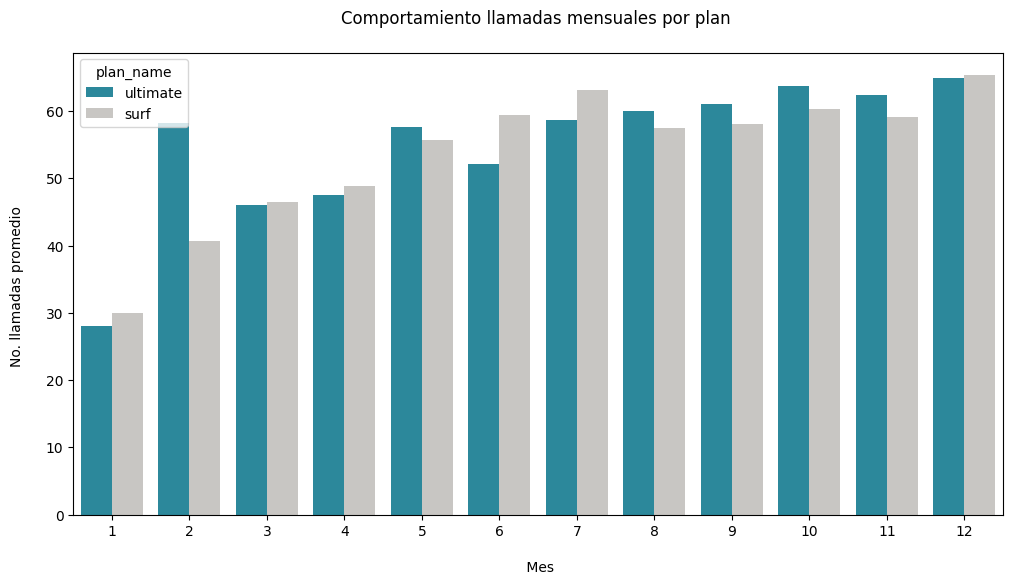

In [274]:
# Comportamiento de llamadas 
## Obtener el estadística descriptiva del total de llamadas mensuales
calls_summary= total_user_info.groupby(by=["plan_name", "month"])["total_calls"].agg(promedio="mean", varianza= "var", desv="std", mediana="median", minimo="min", maximo="max").round(2)

## Gráfico de barras para el promedio de llamadas mensuales por plan
### Customización
plt.figure(figsize=(12,6))
custom_palette = {"surf":"#c9c6c2" , "ultimate":"#1995AD"}

## Gráfica de barras 
sns.barplot(data=calls_summary, 
            x="month", y="promedio", 
            hue="plan_name", hue_order=["ultimate", "surf"],
            palette= custom_palette)
plt.title("Comportamiento llamadas mensuales por plan \n")
plt.xlabel(" \n Mes")
plt.ylabel("No. llamadas promedio \n")
plt.show()

Posteriormente, obtenemos el resumen estadístico por grupo y la distribución de los datos del número de llamadas realizadas por los usuarios. Además realizamos el histograma con la distribución de los mismos. 

In [275]:
# Distribución del numero de llamadas por plan
## Estadísticos descriptivos del total de llamadas
total_user_info.groupby(by=["plan_name"])["total_calls"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
plan_name,,,,,,,,
surf,1573.0,59.81,32.02,0.0,39.0,60.0,79.0,205.0
ultimate,720.0,60.63,33.24,0.0,36.0,61.0,80.0,191.0


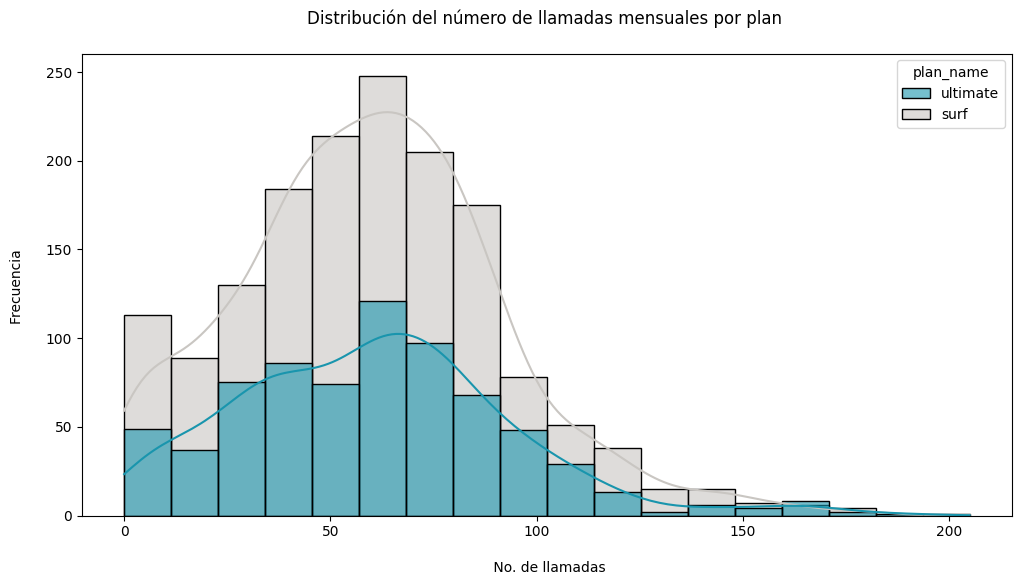

In [276]:
## Gráfico distribución de llamadas por plan
### Customización
plt.figure(figsize=(12, 6))
custom_palette= ["#1995AD" , "#c9c6c2"]

### Histograma número de llamadas por plan
sns.histplot(data=total_user_info, 
            x="total_calls",
            hue="plan_name", hue_order=["ultimate", "surf"],
            palette= custom_palette, kde= True,
            bins=18,alpha=0.6)
plt.title("Distribución del número de llamadas mensuales por plan \n")
plt.xlabel(" \n No. de llamadas")
plt.ylabel("Frecuencia \n")
plt.show()

Finalmente, a través de un gráfico de cajas y bigotes, observamos de manera visual la comparación en el número de llamadas realizadas por los clientes por plan. 

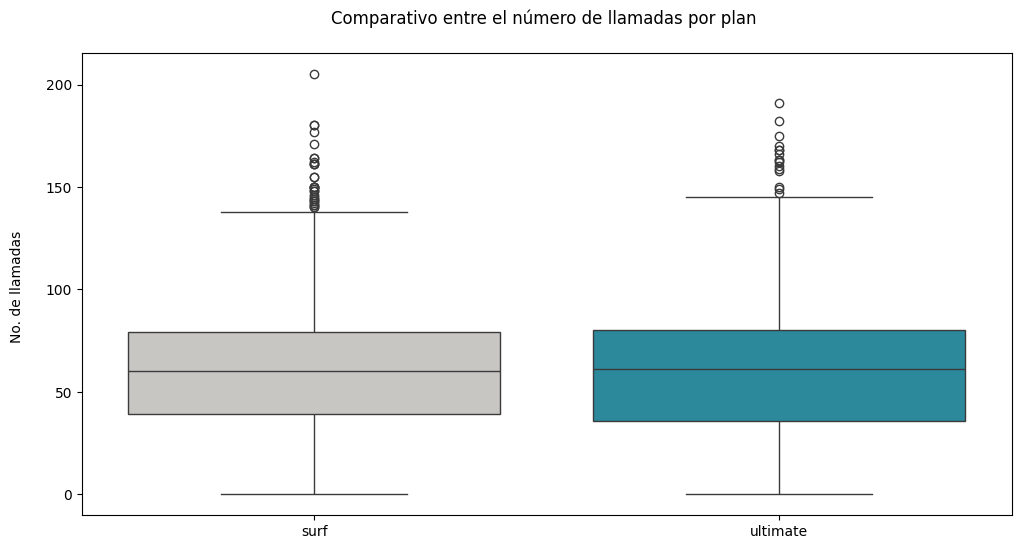

In [277]:
# Comparación del número de llamadas entre planes
## Customización
plt.figure(figsize=(12,6))
custom_palette = {"surf":"#c9c6c2" , "ultimate":"#1995AD"}

sns.boxplot(data=total_user_info, 
            x="plan_name", y="total_calls", 
            hue="plan_name", hue_order=["ultimate", "surf"],
            palette= custom_palette)
plt.title("Comparativo entre el número de llamadas por plan \n")
plt.xlabel(None)
plt.ylabel("No. de llamadas \n")
plt.show()

Además del número de llamadas, para entender el comportamiento de los clientes, analizamos la duración de las llamadas. Para ello, observamos el comportamiento promedio de la duración de las llamadas mes con mes. 

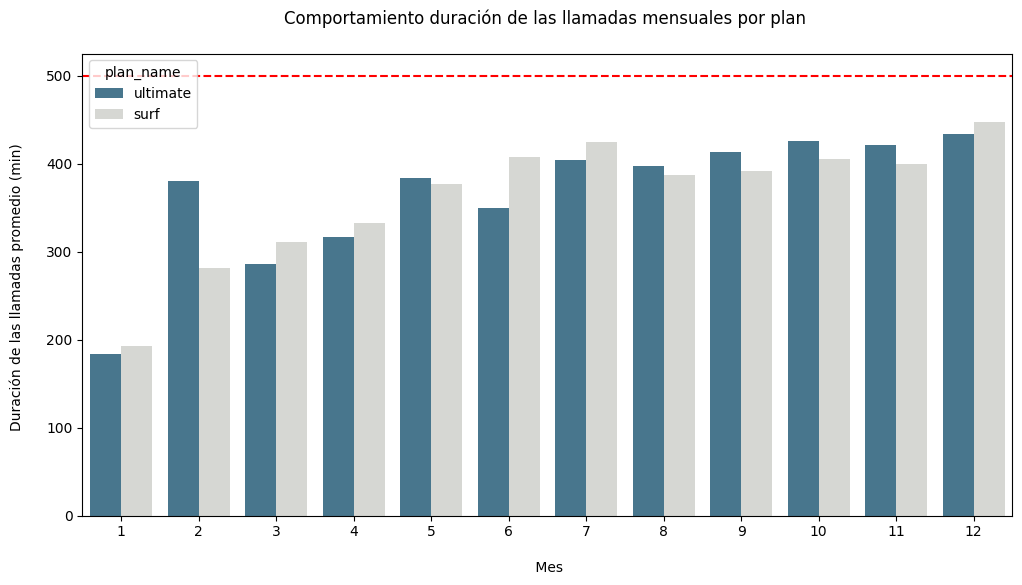

In [278]:
# Comportamiento de duración de las llamadas 
## Obtener el estadística descriptiva del total de llamadas mensuales
duration_summary= total_user_info.groupby(by=["plan_name", "month"])["total_minutes"].agg(promedio="mean", varianza= "var", desv="std", mediana="median", minimo="min", maximo="max").round(2)

## Gráfico de barras para el promedio de la duración de las llamadas por plan
### Customización
plt.figure(figsize=(12,6))
custom_palette = {"surf":"#d7d8d2" , "ultimate":"#3d7a98"}

## Gráfica de barras 
sns.barplot(data=duration_summary, 
            x="month", y="promedio", 
            hue="plan_name", hue_order=["ultimate", "surf"],
            palette= custom_palette)
plt.title("Comportamiento duración de las llamadas mensuales por plan \n")
plt.xlabel(" \n Mes")
plt.ylabel("Duración de las llamadas promedio (min) \n")
plt.axhline(y=500, color="red", linestyle="--", linewidth=1.5)
plt.show()

Y similar a lo realizado con el número de llamadas, obtuvimos los resumenes estadísticos y la distribución en la duración de las llamadas de los clientes de acuerdo a su plan.

In [279]:
# Distribución de la duración de llamadas por plan
## Estadísticos descriptivos de la duración de las llamadas
total_user_info.groupby(by=["plan_name"])["total_minutes"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
plan_name,,,,,,,,
surf,1573.0,404.76,221.66,0.0,255.47,401.76,543.68,1431.22
ultimate,720.0,406.19,227.25,0.0,246.29,398.58,532.23,1292.09


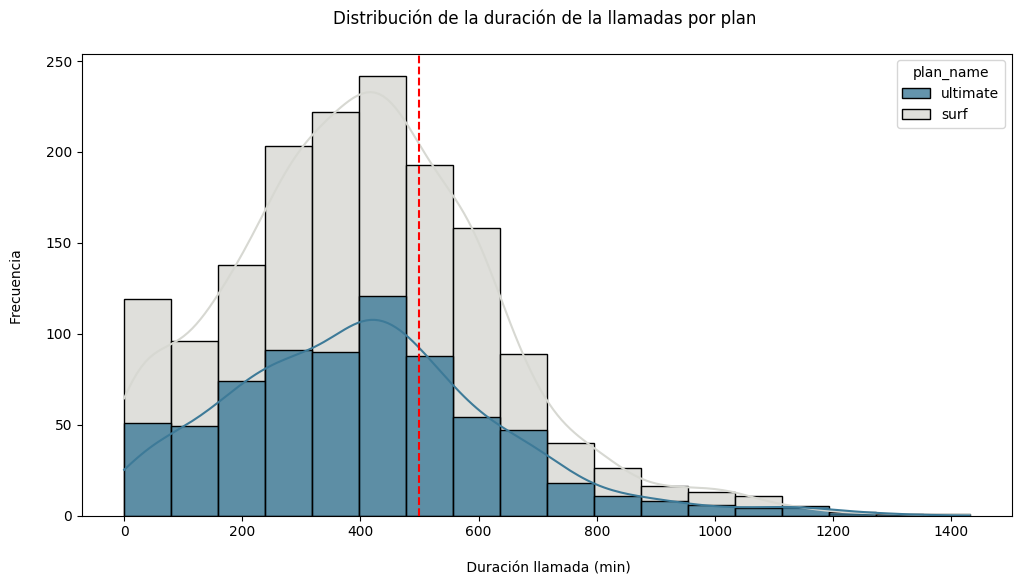

In [280]:
## Gráfico distribución de la distribución de las llamadas por plan
### Customización
plt.figure(figsize=(12, 6))
custom_palette= ["#3d7a98" , "#d7d8d2"]

### Histograma número de llamadas por plan
sns.histplot(data=total_user_info, 
            x="total_minutes",
            hue="plan_name", hue_order=["ultimate", "surf"],
            palette= custom_palette, kde= True,
            bins=18,alpha=0.8)
plt.title("Distribución de la duración de la llamadas por plan \n")
plt.xlabel(" \n Duración llamada (min)")
plt.ylabel("Frecuencia \n")
plt.axvline(x=500, color="red", linestyle="--", linewidth=1.5)
plt.show()

**Conclusión comportamiento en las llamadas**  
    
De manera general observamos que **el número de llamadas** tiende a aumentar mes con mes para ambos planes.

- El plan **Surf** muestra un aumento constante en el promedio de llamadas desde enero, alcanzando un pico en julio, seguido de una ligera disminución en agosto. Sin embargo, experimenta otro crecimiento en diciembre, donde alcanza un máximo de 205 llamadas. 

- El plan **Ultimate** muestra un pico llamadas en febrero, seguido de un crecimiento constante hasta junio. A partir de julio, observamos una ligera disminución, pero repunta en agosto y continúa creciendo hasta diciembre, alcanzando un máximo de 191 llamadas. 

Durante el primer semestre, el númeor de llamadas es generalmente mayor en el plan Surf, excepto en febrero y mayo. Por otro lado, el segundo semestre, el plan Ultimate muestra un mayor número de llamadas mayor al plan Surf, salvo julio y diciembre. 


El análisis de la distribución revela que el número de llamadas es similar en ambos planes, aunque con variaciones en el número total de llamadas. En ambos gráficos, la distribución se asemeja a una normal y exhiben un sesgo positivo, lo que podría indicar que una parte de los usuarios tiende a utilizar más minutos de los que se incluyen en las tarifas. 

Las diferencias en los percentiles 25 y 75 son mínimas entre los planes, siendo ligeramente más altos en el plan Surf. Este comportamiento podría estar relacionado con factores estacionales o promociones de la compañía, lo cual es necesario corroborar con el supervisor.

En cuanto a la **duración de las llamadas**, el comportamiento promedio a lo largo del año sigue un patrón similar al del número de llamadas, mostrando un crecimiento gradual. 

La duración promedio de las llamadas en el plan Surf es comparable a la del plan Ultimate, aunque ambos presentan una alta variación en los datos. En promedio, ninguno de los planes excede el límite de 500 minutos, ni siquiera el plan Surf. Sin embargo, la distribución de los datos indica que el 75% de los usuarios tiene una duración de llamadas superior a 500 minutos. Para el plan Surf, esto representa un límite establecido, lo que puede resultar en restricciones en el uso del servicio, generando potencial insatisfacción del cliente o la necesidad de ofrecer un cambio de plan.

Valdría la pena realizar un análisis más profundo sobre el gasto extra que enfrentan los usuarios del plan Surf al exceder el límite de duración de las llamadas. Esto permitirá comprender mejor el comportamiento de los clientes y ajustar las ofertas de los planes según sus necesidades.

#### Comportamiento de mensajes
A continuación, examinamos el comportamiento de los mensajes enviados por los usuarios de cada plan.

En primer lugar observamos el promedio de mensajes realizados de manera mensual por parte de los usuarios de ambos planes. 

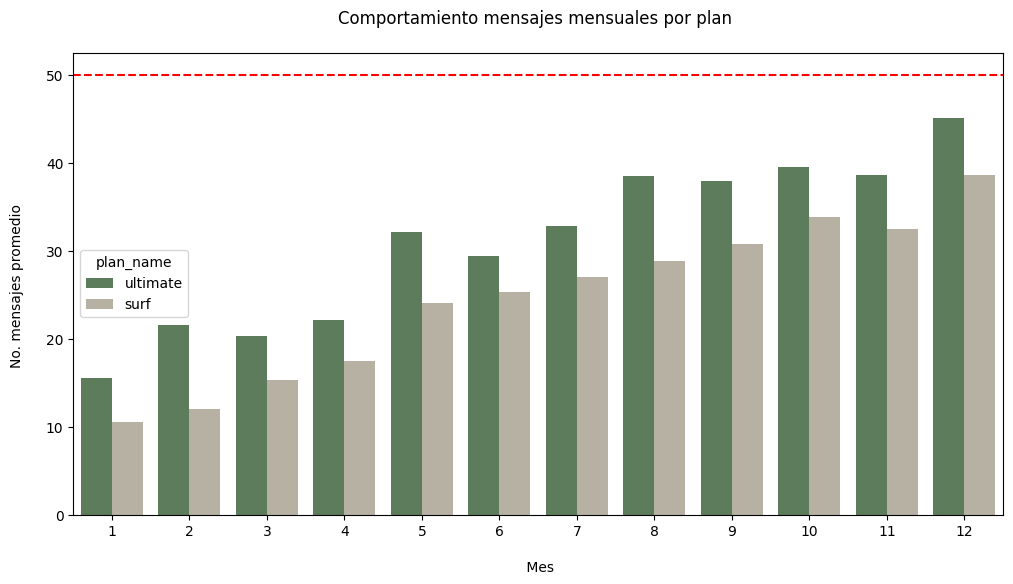

In [281]:
# Comportamiento de mensajes 
## Obtener el estadística descriptiva del total mensajes mensuales
messages_summary= total_user_info.groupby(by=["plan_name", "month"])["total_messages"].agg(promedio="mean", varianza= "var", desv="std", mediana="median", minimo="min", maximo="max").round(2)

## Gráfico de barras para el promedio de mensajes mensuales por plan
### Customización
plt.figure(figsize=(12,6))
custom_palette = {"surf":"#B9B3A0" , "ultimate":"#588157"}

## Gráfica de barras 
sns.barplot(data=messages_summary, 
            x="month", y="promedio", 
            hue="plan_name", hue_order=["ultimate", "surf"],
            palette= custom_palette)
plt.title("Comportamiento mensajes mensuales por plan \n")
plt.xlabel(" \n Mes")
plt.ylabel("No. mensajes promedio \n")
plt.axhline(y=50, color="red", linestyle="--", linewidth=1.5)
plt.show()

Posteriormente, analizamos como es que se visualiza la distribución en el número de mensajes que los usuarios realiza. 

In [282]:
# Distribución del numero de mensajes por plan
## Estadísticos descriptivos del total de mensajes
total_user_info.groupby(by=["plan_name"])["total_messages"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
plan_name,,,,,,,,
surf,1573.0,31.16,33.57,0.0,3.0,24.0,47.0,266.0
ultimate,720.0,37.55,34.77,0.0,7.0,30.0,61.0,166.0


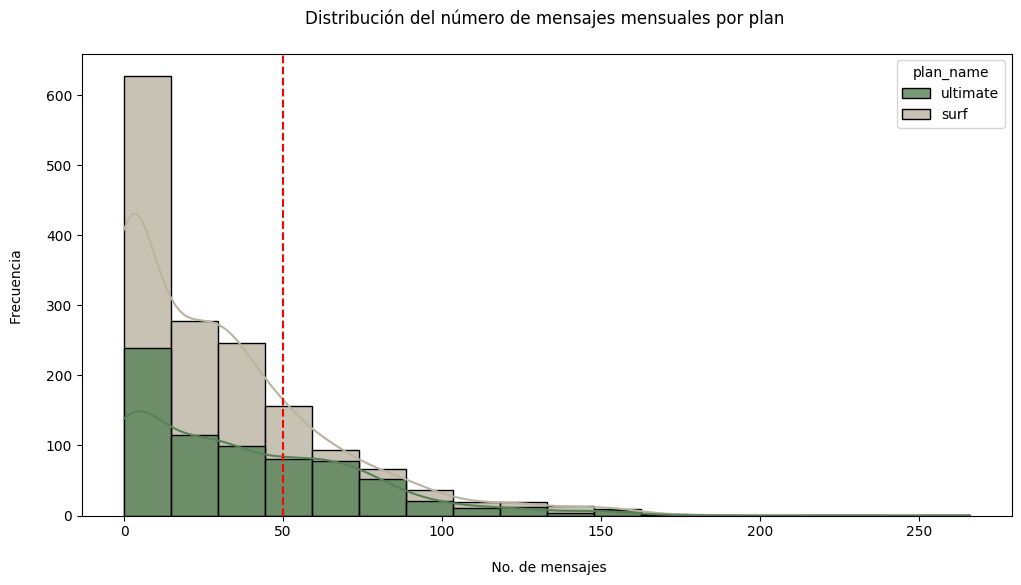

In [283]:
## Gráfico distribución de mensajes por plan
### Customización
plt.figure(figsize=(12, 6))
custom_palette= ["#588157" , "#B9B3A0"]

### Histograma número de llamadas por plan
sns.histplot(data=total_user_info, 
            x="total_messages",
            hue="plan_name", hue_order=["ultimate", "surf"],
            palette= custom_palette, kde= True,
            bins=18,alpha=0.8)
plt.title("Distribución del número de mensajes mensuales por plan \n")
plt.xlabel(" \n No. de mensajes")
plt.ylabel("Frecuencia \n")
plt.axvline(x=50, color="red", linestyle="--", linewidth=1.5)
plt.show()

Hicimos un gráfico de comparación para lizar que tan distinto es el número de mensajes que se realizan por plan. 

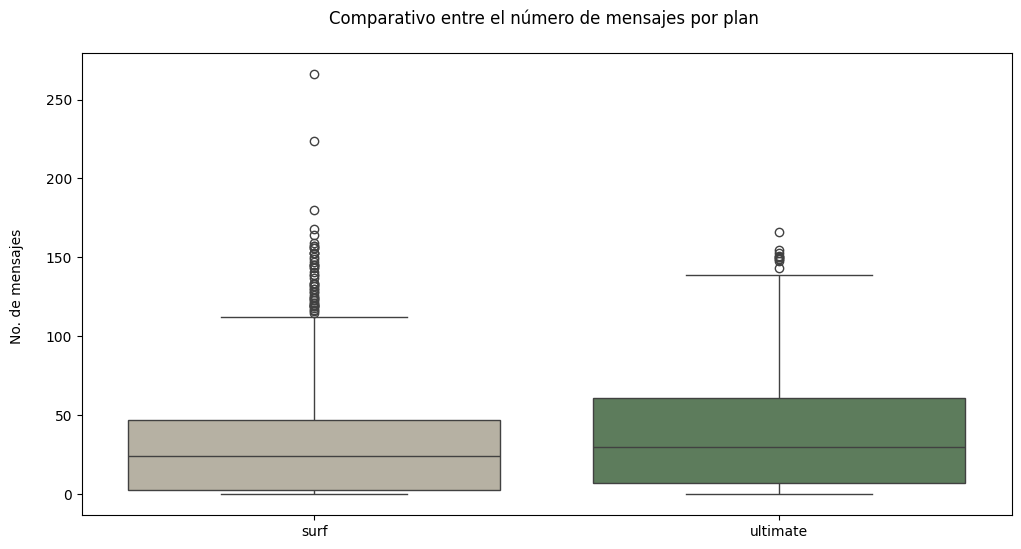

In [284]:
# Comparación del número de mensajes entre planes
## Customización
plt.figure(figsize=(12,6))
custom_palette = {"surf":"#B9B3A0" , "ultimate":"#588157"}

sns.boxplot(data=total_user_info, 
            x="plan_name", y="total_messages", 
            hue="plan_name", hue_order=["ultimate", "surf"],
            palette= custom_palette)
plt.title("Comparativo entre el número de mensajes por plan \n")
plt.xlabel(None)
plt.ylabel("No. de mensajes \n")
plt.show()

**Conclusión comportamiento en los mensajes** 

El análisis del uso de mensajes a lo largo del año muestra un crecimiento en ambos planes, con un incremento en diciembre. Los usuarios del plan Ultimate presentan picos adicionales en mayo, agosto y octubre, mientras que los del plan Surf muestra un crecimiento más uniforme. En promedio, los usuarios de Ultimate envían más mensajes que los de Surf, aunque en ninguno de los casos se exceden los límites de mensajes establecidos en sus planes.

También observamos un sesgo positivo en ambas distribuciones, donde los promedios son más altos que las medianas, lo que indica que un pequeño grupo de usuarios envía muchos más mensajes que el promedio. Esto se refleja especialmente en el plan Surf, donde el 75% de los usuarios envía hasta 47 mensajes, existe un caso atípico de un usuario que envió 266 mensajes. Este usuario sería un candidato interesante para analizar y posiblemente sugerirle un cambio a un plan más adecuado.

Podemos concluir que aunque los usuarios de Ultimate hacen un uso ligeramente mayor de los mensajes, la mayoría de los usuarios de ambos planes no excede los límites permitidos. El análisis de este comportamiento nos ofrece oportunidades para optimizar las tarifas o mejorar la personalización de los planes para clientes con comportamientos extremos.

#### Comportamiento de internet
Finalmente, analizamos el consumo de Internet de los usuarios, enfocándonos en las sesiones de navegación a lo largo del año.

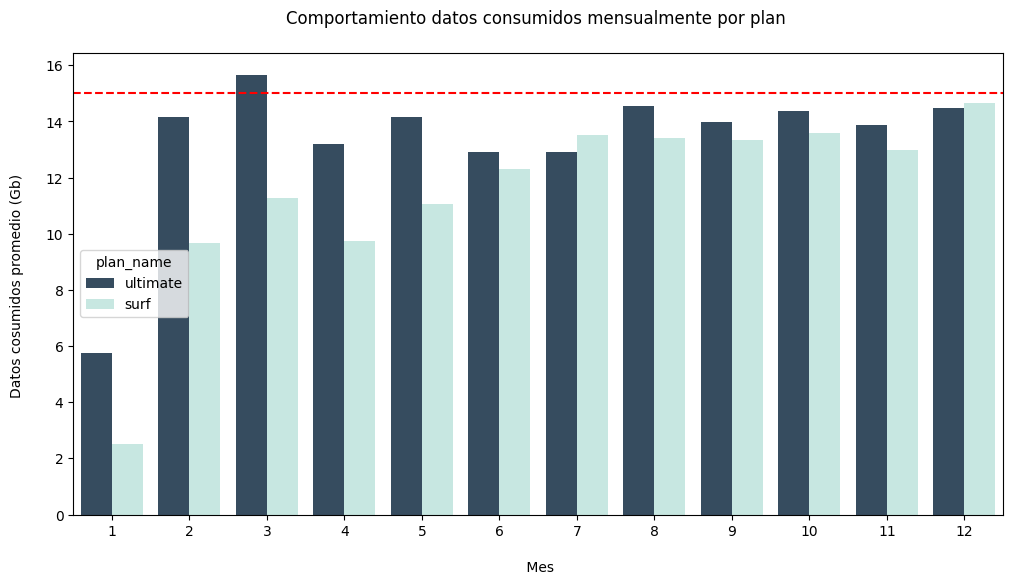

In [285]:
# Comportamiento de tráfico de internet 
## Obtener el estadística descriptiva del total mensajes mensuales
internet_summary= total_user_info.groupby(by=["plan_name", "month"])["total_internet_gb"].agg(promedio="mean", varianza= "var", desv="std", mediana="median", minimo="min", maximo="max").round(2)

## Gráfico de barras para el promedio de mensajes mensuales por plan
### Customización
plt.figure(figsize=(12,6))
custom_palette = {"surf":"#c2ece4" , "ultimate":"#2f4d66"}

## Gráfica de barras 
sns.barplot(data=internet_summary, 
            x="month", y="promedio", 
            hue="plan_name", hue_order=["ultimate", "surf"],
            palette= custom_palette)
plt.title("Comportamiento datos consumidos mensualmente por plan \n")
plt.xlabel(" \n Mes")
plt.ylabel("Datos cosumidos promedio (Gb) \n")
plt.axhline(y=15, color="red", linestyle="--", label="Límite 50", linewidth=1.5)
plt.show()

Posteriormente observamos la distribución de los datos mediante resumen de los estadísticos y el histograma del consumo de los datos entre planes. 

In [286]:
# Distribución del numero de datos consumidos por plan
## Estadísticos descriptivos del total de datos
total_user_info.groupby(by=["plan_name"])["total_internet_gb"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
plan_name,,,,,,,,
surf,1573.0,13.25,7.91,0.0,8.0,12.0,17.0,70.0
ultimate,720.0,13.99,8.04,0.0,9.0,12.0,18.0,44.0


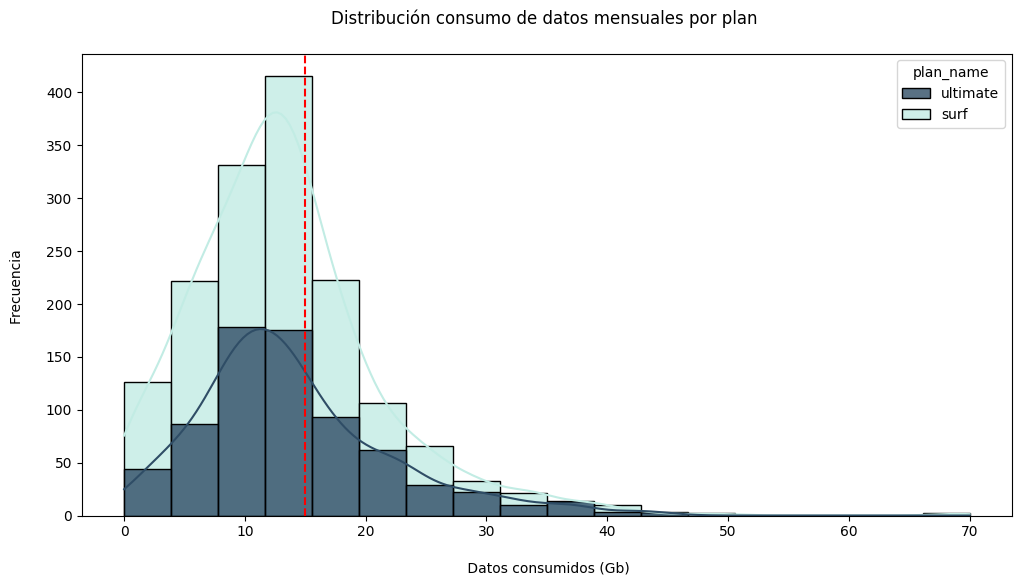

In [287]:
## Gráfico distribución de datos por plan
### Customización
plt.figure(figsize=(12, 6))
custom_palette= ["#2f4d66" , "#c2ece4"]

### Histograma número de llamadas por plan
sns.histplot(data=total_user_info, 
            x="total_internet_gb",
            hue="plan_name", hue_order=["ultimate", "surf"],
            palette= custom_palette, kde= True,
            bins=18,alpha=0.8)
plt.title("Distribución consumo de datos mensuales por plan \n")
plt.xlabel(" \n Datos consumidos (Gb)")
plt.ylabel("Frecuencia \n")
plt.axvline(x=15, color="red", linestyle="--", label="Límite 50", linewidth=1.5)
plt.show()

Similar a los pasos anteriores, realizamos una comparación gráfica entre el consumo de datos en los dos distintos tipos de plan. 

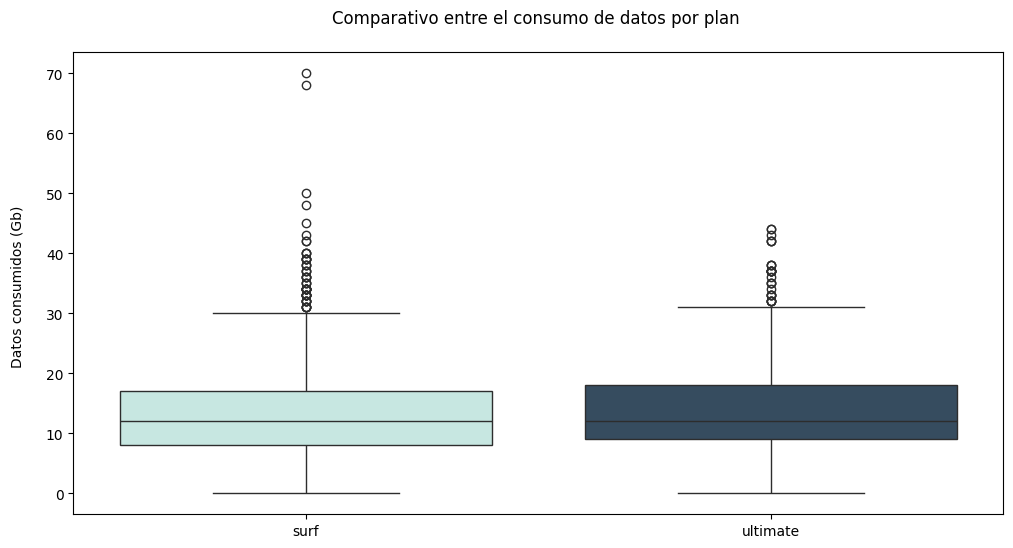

In [288]:
# Comparación del gasto de internet entre planes
## Customización
plt.figure(figsize=(12,6))
custom_palette = {"surf":"#c2ece4" , "ultimate":"#2f4d66"}

sns.boxplot(data=total_user_info, 
            x="plan_name", y="total_internet_gb", 
            hue="plan_name", hue_order=["ultimate", "surf"],
            palette= custom_palette)
plt.title("Comparativo entre el consumo de datos por plan \n")
plt.xlabel(None)
plt.ylabel("Datos consumidos (Gb) \n")
plt.show()

**Conclusión comportamiento consumo de datos** 

El análisis del consumo de datos móviles revela un comportamiento diferente en comparación con las llamadas y los mensajes de texto. 

Durante el primer mes, el uso de internet es moderado, con ningún usuario superando los 6 Gb en ambos planes. Sin embargo, a partir de febrero, observamos un aumento en el tráfico de datos, alcanzando picos en marzo, especialmente entre los usuarios del plan Ultimate. A lo largo del año, el uso de datos muestra fluctuaciones, con picos adicionales en julio y diciembre para los usuarios del plan Surf, siendo diciembre el mes de mayor consumo.

En resumen, aunque el consumo promedio es similar en ambos planes, la distribución muestra que el 75% de los usuarios del plan Surf consumen hasta 17 Gb, superando el límite del plan de 15 Gb, e incluso existe un caso extremo con un uso de hasta 70 Gb. En el caso de los usuarios con el plan Ultimate, observamos que el 75% de los usuarios consume hasta 18 Gb, manteniéndose dentro del límite del plan, pero se registra un caso de 44 Gb, que excede la cuota asignada.

Esto puede representar una oportunidad para revisar las necesidades de estos usuarios y ajustar las tarifas o promover cambios de plan. Sería interesante analizar el comportamiento de aquellos usuarios que consumen más datos para identificar patrones y posibles estrategias de retención o personalización de los planes.

### Ingreso

Como parte final del análisis, determinamos el compartamiento del gasto que realizan los usuarios de los dos distintos planes.Primero nos enfocamos en visualizar como es el gasto promedio mensual. 

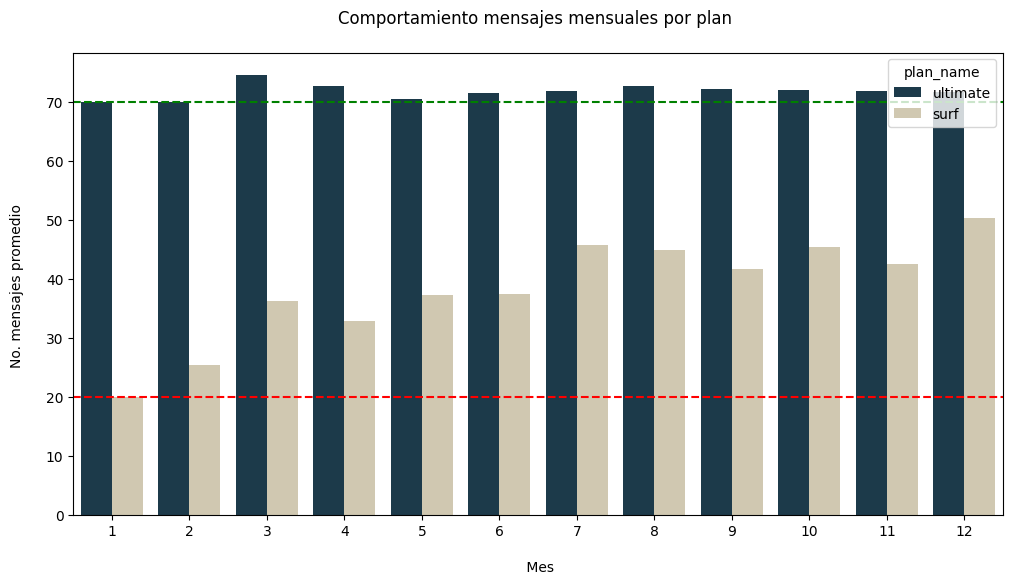

In [289]:
# Comportamiento de gastos mensuales 
## Obtener el estadística descriptiva del total mensajes mensuales
revenue_summary= total_user_info.groupby(by=["plan_name", "month"])["monthly_revenue"].agg(promedio="mean", varianza= "var", desv="std", mediana="median", minimo="min", maximo="max").round(2)

## Gráfico de barras para el promedio de mensajes mensuales por plan
### Customización
plt.figure(figsize=(12,6))
custom_palette = {"surf":"#d5cbac" , "ultimate":"#153c51"}

## Gráfica de barras 
sns.barplot(data=revenue_summary, 
            x="month", y="promedio", 
            hue="plan_name", hue_order=["ultimate", "surf"],
            palette= custom_palette)
plt.title("Comportamiento mensajes mensuales por plan \n")
plt.xlabel(" \n Mes")
plt.ylabel("No. mensajes promedio \n")
plt.axhline(y=20, color="red", linestyle="--", label="Límite 50", linewidth=1.5)
plt.axhline(y=70, color="green", linestyle="--", label="Límite 50", linewidth=1.5)
plt.show()

Del mismo modo, describimos y visualizamos la distribución de los gastos de los usuarios. 

In [290]:
# Distribución del numero de mensajes por plan
## Estadísticos descriptivos del total de mensajes
total_user_info.groupby(by=["plan_name"])["monthly_revenue"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
plan_name,,,,,,,,
surf,1573.0,43.81,51.96,20.0,20.0,20.69,40.0,571.41
ultimate,720.0,71.96,10.63,70.0,70.0,70.00,70.0,168.00


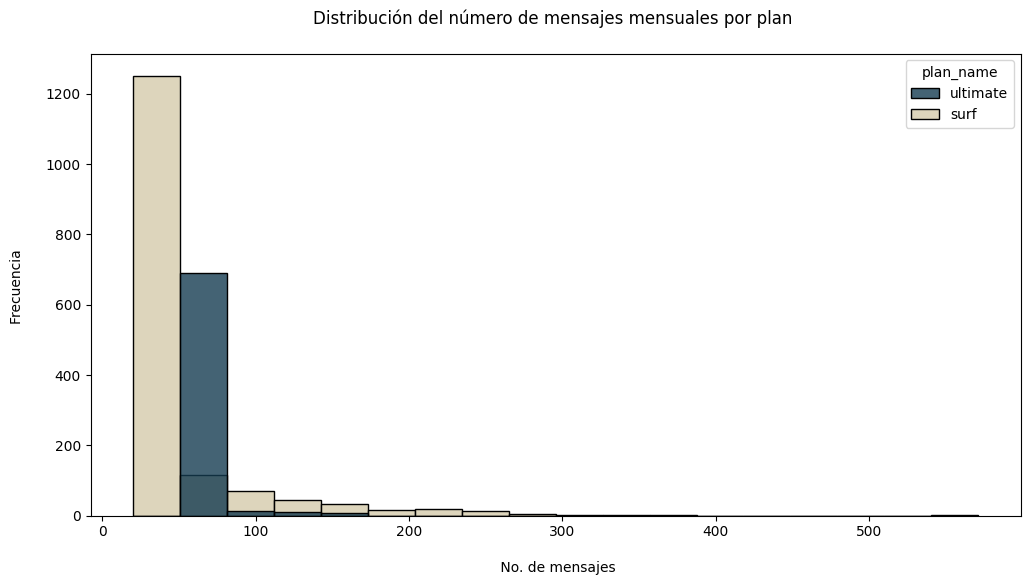

In [291]:
## Gráfico distribución de mensajes por plan
### Customización
plt.figure(figsize=(12, 6))
custom_palette= ["#153c51" , "#d5cbac"]

### Histograma número de llamadas por plan
sns.histplot(data=total_user_info, 
            x="monthly_revenue",
            hue="plan_name", hue_order=["ultimate", "surf"],
            palette= custom_palette, kde= False,
            bins=18,alpha=0.8)
plt.title("Distribución del número de mensajes mensuales por plan \n")
plt.xlabel(" \n No. de mensajes")
plt.ylabel("Frecuencia \n")
plt.show()

Posteriormente comparamos el gasto que realizan los usuarios del plan Surf vs el plan Ultimate. 

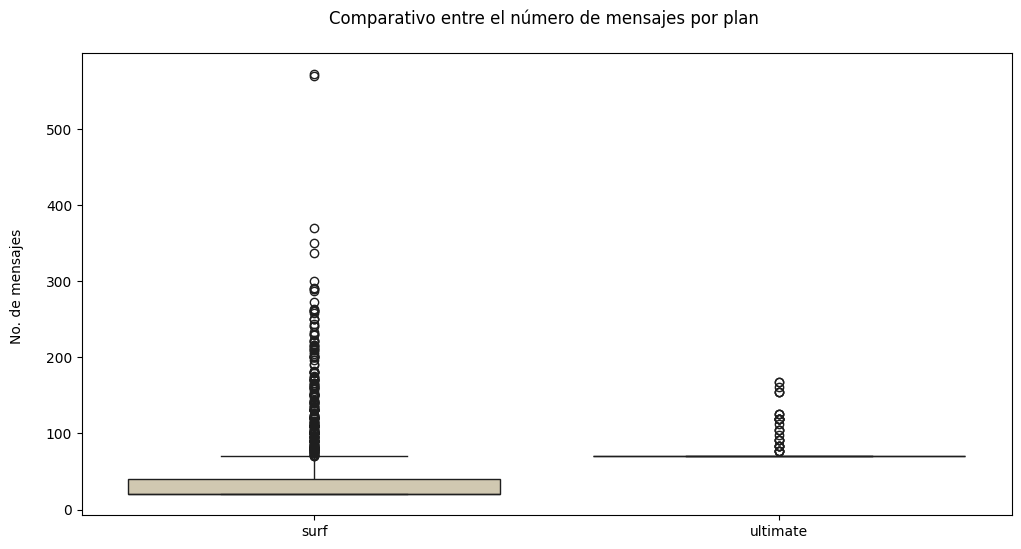

In [292]:
# Comparación del número de mensajes entre planes
## Customización
plt.figure(figsize=(12,6))
custom_palette = {"surf":"#d5cbac" , "ultimate":"#153c51"}

sns.boxplot(data=total_user_info, 
            x="plan_name", y="monthly_revenue", 
            hue="plan_name", hue_order=["ultimate", "surf"],
            palette= custom_palette)
plt.title("Comparativo entre el número de mensajes por plan \n")
plt.xlabel(None)
plt.ylabel("No. de mensajes \n")
plt.show()

**Conclusión comportamiento de los gastos** 

El análisis de los gastos mensuales de los usuarios de Megaline mostro una diferencia esperada entre los dos planes: Surf, con una cuota mensual de 20 dólares, y Ultimate, con una cuota de 70 dólares.

A lo largo del año observamos que los usuarios con el plan Surf van teniendo un incremento gradual en sus gastoas conforme avanza el año. A aprtire del mes de febrero, el gasto promedio comienza a aumentar, alcanzando su pico en los meses de julio y diciembre. En el caso de los usiarios del plan Ultimate, los gastos son más estables, con valores cercanos a la tarifa base de los 70 dólares mensuales. Esto indica que existen cargos extra pero no son comparables con los cobros extra que se generan en el plan Surf. 

Para los usuarios del plan Surf, su gasto promedio mensual fue de 43.81 dólares con una desviación estándar de 51.96 dólares, indicando una gran variación en el gasto mensual. En el caso de los usuarios con el plan Ultimate, pagan consistentemente la cuota mensual de 70 dólares, con un gasto promedio de 71.96 dólares y una desviación estándar de 10.63 dólares.

De acuerdo con la distribución de los valores, podemos notar que en el plan Surf, la mayoría de usuarios gasta 40 dolares o menos al mes, lo que implica que existen usuarios que tienen un gasto adicional, más allá de la tarifa básica. Por su parte, en el plan Ultimate se registra que el 75% de los usuarios paga exactamente 70 dólares, con solo algunos casos que reportan un gasto máximo de hasta 168 dólares, lo que significa que un pequeño grupo de usuarios excedió su límite de datos. 

> La asimetría y la abundancia de los valores atípicos **pueden afectar nuestros análisis** si consideramos un tipo de distribución normal. La media y la desviación estándar son propensos a los valores extremos. 

Por lo tanto, sugerimos que para obtener una representación más precisa del comportamiento típico de los usuarios, nos enfoquemos en una distribución **no paramétrica** utilizando la mediana y los rangos intercuartílicos (cuartiles 25% y 75%), así como en los valores mínimos y máximos para un mayor entendimiento del comportamiento de los usuarios. 

## Pruebas de hipótesis

### Diferencia entre el gasto por plan

El objetivo del proyecto es identificar si existe una diferencia en el ingreso promedio entre los usuarios del plan Ultimate y el plan Surf. La formulación de nuestras hipótesis fue la siguiente: 

- $Ho$: El ingreso promedio de los usuarios Ultimate es igual al ingreso promedio de los usuarios Surf. 

- $Ha$: El ingreso promedio de los usuarios Ultimate es distinto al ingreso promedio de los usuarios Surf. 

Para escoger la prueba estadística a utilizar

1. Verificamos la normalidad de los datos.
2. Comparamos la igualdad de las varianzas. 

Establecemos como valor de alfa 0.05 de significancia. 

Para verificar la normalidad de los datos. observamos la distribución de los datos observada en los gráficos y al notar que el promedio y la mediana no son similares, asumimos que no tiene un distribución normal. Podríamos usar la prueba de Shapiro, sin embargo, la *n* es mayor a lo establecido por la prueba. 

Para comparar la igualdad de las varianzas utilizamos el test de Levene. 


In [293]:
# Prueba las hipótesis diferencia entre planes

## Establecer valores
alpha = 0.05

## Dividimos los grupos por plan
surf_clients_revenue = total_user_info[total_user_info["plan_name"]=="surf"]["monthly_revenue"]
ultimate_clients_revenue = total_user_info[total_user_info["plan_name"]=="ultimate"]["monthly_revenue"]

## Probamos la normalidad de los datos (En caso de requerirse)
# surf_clients_shapiro = st.shapiro(surf_clients_revenue)
# surf_clients_shapiro

## Verificar homogeneidad de las varianzas
plan_levene = st.levene(surf_clients_revenue, ultimate_clients_revenue)
print(f"Valor de la prueba: {plan_levene.statistic.round(2)}; Valor de p: {plan_levene.pvalue}")

Valor de la prueba: 125.78; Valor de p: 1.8653115948047192e-28


Dado que los ingresos de los dos grupos no siguen una distribución normal y tienen varianzas significativamente diferentes, optamos por utilizar la prueba no paramétrica U de Mann-Whitney debido a que no depende de la suposición de varianzas iguales o de normalidad.

> De tener las dos condiciones de homocesteidad en las varianzas y una distribución normal se recomienda utilizar la prueba `ttest_ind`.

In [294]:
## Prueba de hipótesis U de Mann
plan_mannwhitneyu= st.mannwhitneyu(surf_clients_revenue, ultimate_clients_revenue)

print(f"Valor de la prueba: {plan_mannwhitneyu.statistic.round(2)}; Valor de p: {plan_mannwhitneyu.pvalue}")

## Comparar el valor p con el umbral
if (plan_mannwhitneyu.pvalue < alpha):
    print("Aceptamos la hipótesis alternativa")
else:
    print("Aceptamos la hipótesis nula")

print("El promedio de gasto plan surf es:", surf_clients_revenue.mean().round(2), "vs el promedio de gasto plan ultimate es:", ultimate_clients_revenue.mean().round(2))
print("La mediana de gasto plan surf es:", surf_clients_revenue.median().round(2), "vs la mediana de gasto plan ultimate es:", ultimate_clients_revenue.median().round(2))

Valor de la prueba: 175860.0; Valor de p: 3.517801685175086e-164
Aceptamos la hipótesis alternativa
El promedio de gasto plan surf es: 43.81 vs el promedio de gasto plan ultimate es: 71.96
La mediana de gasto plan surf es: 20.69 vs la mediana de gasto plan ultimate es: 70.0


**Conclusión diferencia de gasto por plan** 

Dado que el valor de *p* es menor al valor de alfa, **rechazamos la hipótesis nula y aceptamos la hipótesis alternativa**, es decir "El ingreso promedio de los usuarios Ultimate es distinto al ingreso promedio de los usuarios Surf". Esto significa que, los ingresos promedio de los usuarios Ultimate es significativamente mayor al gasto promedio de los clientes del plan Surf. 

### Diferencia de gasto entre regiones

Como segundo objetivo quisimos identificar si existe una diferencia en el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones. La formulación de nuestras hipótesis fue la siguiente: 

- $Ho$: El ingreso promedio de los usuarios del área NY-NJ es igual al ingreso promedio de los usuarios de otras regiones. 

- $Ha$: El ingreso promedio de los usuarios del área NY-NJ es diferente al ingreso promedio de los usuarios de otras regiones. 

Establecemos como valor de alfa 0.05 de significancia.

Como primer paso,realizamos una inspeccion de las regiones. Nuestro objetivo se centró en identificar si la region de *Ny-NJ es diferente al de *NY-NJ-PA*, que teniamos en nuestra columna previamente arreglada `state`. 

In [295]:
## Identificación de los estados
print(df_users["state"].value_counts().sort_index())

state
AL              4
AZ             11
CA             78
CO              9
CT              6
DC-VA-MD-WV    11
FL             25
GA             14
HI              5
IL-IN-WI       19
IN              6
KY-IN           5
LA              9
MA-NH          12
MD              4
MI             16
MN-WI          11
MO-IL           3
MO-KS           2
NC              2
NC-SC           8
NE-IA           2
NM              2
NV              7
NY              6
NY-NJ-PA       80
OH              9
OH-KY-IN        8
OK              6
OR-WA           8
PA              5
PA-NJ-DE-MD    17
RI-MA           3
SC              7
TN             12
TN-MS-AR        2
TX             39
UT              3
VA              4
VA-NC           4
WA             13
WI              3
Name: count, dtype: int64


Observamos que en ningun caso existe solo *NY-NJ*, siempre va acompañado de *NY-NJ-PA*, siendo observada en 80 de los usuarios de los planes. Con eso en mente, etiquetamos las columnas que tengan el área NY-NJ-PA como la "NP-NJ-PA" y las demas como *Other region*.

In [296]:
## Identificamos las columnas con region deseada en formato booleano
df_users["is_ny_np_pa"] = df_users["state"] == "NY-NJ-PA"

## Hacer más informativa las variables
df_users['is_ny_np_pa'] = df_users['is_ny_np_pa'].replace({True: "NP-NJ", False: "Other region"})

Unimos los datos del usuario con los datos de gastos. 

In [297]:
## Seleccionamos la información necesaria de los gastos
users_revenue = total_user_info[["user_id", "monthly_revenue"]] 

## Seleccionamos la información necesaria de los usuarios
users_region = df_users[["user_id", "state", "is_ny_np_pa"]]

## Unión de los dataFrames
revenue_region = users_revenue.merge(users_region, on = "user_id", how= "left")

## Visualización de la dF creada
revenue_region.head()

,user_id,monthly_revenue,state,is_ny_np_pa
0,1001,20.00,WA,Other region
1,1001,20.00,WA,Other region
2,1001,70.09,WA,Other region
3,1001,20.00,WA,Other region
4,1001,20.00,WA,Other region


Teniendo la base de datos completa, proseguimos a realizar el análisis estadístico para probar nuestra hipótesis. Para escoger la prueba estadística a utilizar

1. Verificamos la normalidad de los datos.
2. Comparamos la igualdad de las varianzas. 

In [298]:
# Prueba las hipótesis diferencia entre regiones

## Establecer valores
alpha = 0.05

## Dividimos los grupos por plan
interested_region_revenue = revenue_region[revenue_region["is_ny_np_pa"]=="NP-NJ"]["monthly_revenue"]
other_region_revenue = revenue_region[revenue_region["is_ny_np_pa"]=="Other region"]["monthly_revenue"]

## Verificar homogeneidad de las varianzas
plan_levene = st.levene(interested_region_revenue, other_region_revenue)
print(f"Valor de la prueba: {plan_levene.statistic.round(2)}; Valor de p: {plan_levene.pvalue}")

Valor de la prueba: 8.18; Valor de p: 0.004264550462154738


In [299]:
# Distribución del numero de mensajes por plan
## Estadísticos descriptivos del total de mensajes
revenue_region.groupby(by=["is_ny_np_pa"])["monthly_revenue"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
is_ny_np_pa,,,,,,,,
NP-NJ,377.0,45.85,40.83,20.0,20.0,22.52,70.0,290.00
Other region,1916.0,53.99,46.10,20.0,20.0,42.38,70.0,571.41


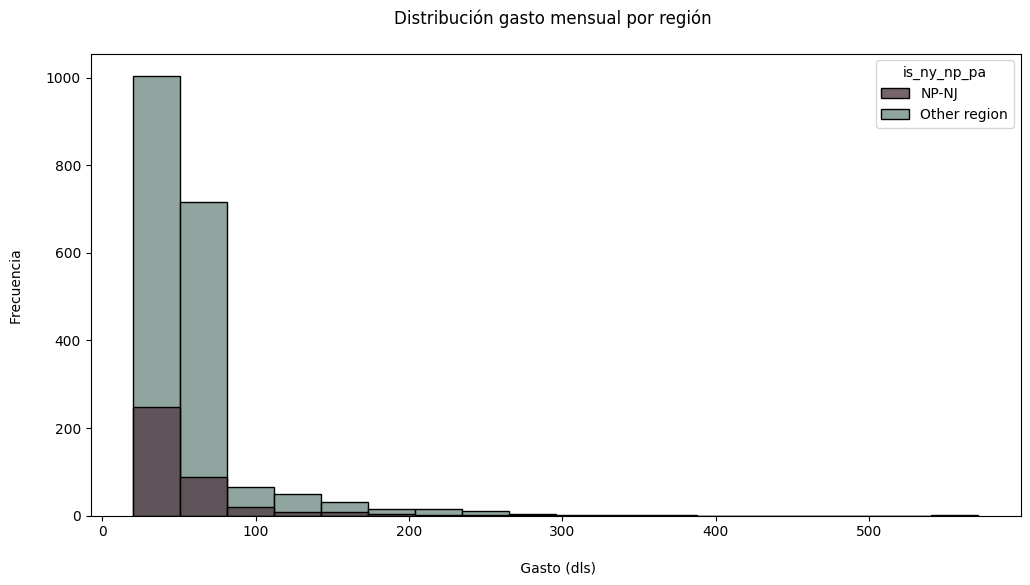

In [300]:
## Gráfico distribución de gastos por region
### Customización
plt.figure(figsize=(12, 6))
custom_palette= ["#534049" , "#758f88"]

### Histograma gastos por region
sns.histplot(data=revenue_region, 
            x="monthly_revenue",
            hue="is_ny_np_pa", hue_order=["NP-NJ", "Other region"],
            palette= custom_palette, kde= False,
            bins=18,alpha=0.8)
plt.title("Distribución gasto mensual por región \n")
plt.xlabel(" \n Gasto (dls)")
plt.ylabel("Frecuencia \n")
plt.show()

De acuerdo con los resultados obtenidos, concluimos que existe una diferencias significativas en las varianzas de las regiones y los valores de los promedios distan mucho de los valores de las medianas, sobre todo para los valores de la región *NP-NJ*. Por lo tanto, asumimos que no tiene un distribución normal y nuevamente utilizamos la prueba de U de Mann Whitney.

In [303]:
## Prueba de hipótesis U de Mann
region_mannwhitneyu= st.mannwhitneyu(interested_region_revenue, other_region_revenue)

print(f"Valor de la prueba: {region_mannwhitneyu.statistic.round(2)}; Valor de p: {region_mannwhitneyu.pvalue}")

## Comparar el valor p con el umbral
if (region_mannwhitneyu.pvalue < alpha):
    print("Aceptamos la hipótesis alternativa")
else:
    print("Aceptamos la hipótesis nula")

print("El promedio de gasto de la región NP-NJ es:", interested_region_revenue.mean().round(2), "vs el promedio de gasto de otras regiones es:", other_region_revenue.mean().round(2))
print("La mediana de gasto de la región NP-NJ es:", interested_region_revenue.median().round(2), "vs la mediana de gasto de otras regiones es:", other_region_revenue.median().round(2))

Valor de la prueba: -3.19; Valor de p: 0.0014487196898316265
Aceptamos la hipótesis alternativa
El promedio de gasto de la región NP-NJ es: 45.85 vs el promedio de gasto de otras regiones es: 53.99
La mediana de gasto de la región NP-NJ es: 22.52 vs la mediana de gasto de otras regiones es: 42.38


**Conclusión diferencia de gasto por región** 

Dado que el valor de *p* es menor al valor de alfa, **rechazamos la hipótesis nula y aceptamos la hipótesis alternativa**, es decir "El ingreso promedio de los usuarios del área NY-NJ es diferente al ingreso promedio de los usuarios de otras regiones". Esto significa que, los ingresos promedio de los usuarios de NP-NJ es significativamente menor al gasto promedio de los clientes de otras regiones. 

## Conclusión general

El anális de los usuarios de Megaline revela los siguientes puntos: 

- El numero de llamadas, mensajes en ambosplanes tiende a aumentar a lo largo del año en ambos planes. Mientras que el uso de datos es fluctuante. En promedio, los usuarios de ambos planes no exceden de los límites de tarifa de la empresa. 

- Existen casos en que algunos de los clientes del plan Surf sobrepasan los límites de duración de llamadas, número de mensajes y sobre todo uso de datos. A diferencia de la gran mayoría de usuarios del plan Ultimate que se mantienen dentro de los rangos permitivos.

- Como era de esperarse, los ingresos promedio del plan  Ultimate son mayores que los ingresos promedio del plan Surf, siendo estadísticamente significativo. 

- De acuerdo con un sub análisis realizado, identificamos que los usuarios de la región NY-NJ generan menos ingresos en comparación con otras regiones. 

De acuerdo con lo anterior y para responder la pregunta inicial; la mejor tarifa la tiene el plan **Ultimate**, ya que muchos usuarios Surf consumen más servicios de los que cubre su tarifa base. En especial, observamos que los clientes prefieren el uso de internet que de los otros dos servicios que se ofrecen. 

Estos resultados no sirven para: 

1. Entender que nuestros clientes del plan Ultimate tienen un perfil de gasto más predecible y constante.
2. Los usuarios de Surf podrían beneficiarse de cambiarse a un plan más adecuado a su nivel de uso.

Es posible que con estos resultados se optimicen las tarifas para el grupo del plan surf o recomendarles un cambio de plan a Ultimate. Podríamos diseñar promociones de cambio de planes en la segunda mitad del año. 